In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
  

**Dataframe**


In [4]:
df = pd.read_csv('big4.csv', encoding='utf-8', delimiter=',')
df.head()

,Year,Firm_Name,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Industry_Affected,Total_Revenue_Impact,AI_Used_for_Auditing,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
0,2020,PwC,2829,51,123,39,Healthcare,114.24,No,57,5.8,8.4
1,2022,Deloitte,3589,185,30,60,Healthcare,156.98,Yes,58,5.3,6.7
2,2020,PwC,2438,212,124,97,Healthcare,131.83,No,76,6.1,6.2
3,2021,PwC,2646,397,55,97,Healthcare,229.11,No,60,5.1,8.6
4,2020,PwC,2680,216,99,46,Healthcare,48.00,No,51,9.1,6.7


In [7]:
df.info()
df.isnull().sum()
df.duplicated().sum()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       100 non-null    int64  
 1   Firm_Name                  100 non-null    object 
 2   Total_Audit_Engagements    100 non-null    int64  
 3   High_Risk_Cases            100 non-null    int64  
 4   Compliance_Violations      100 non-null    int64  
 5   Fraud_Cases_Detected       100 non-null    int64  
 6   Industry_Affected          100 non-null    object 
 7   Total_Revenue_Impact       100 non-null    float64
 8   AI_Used_for_Auditing       100 non-null    object 
 9   Employee_Workload          100 non-null    int64  
 10  Audit_Effectiveness_Score  100 non-null    float64
 11  Client_Satisfaction_Score  100 non-null    float64
dtypes: float64(3), int64(6), object(3)
memory usage: 9.5+ KB


,Year,Total_Audit_Engagements,High_Risk_Cases,Compliance_Violations,Fraud_Cases_Detected,Total_Revenue_Impact,Employee_Workload,Audit_Effectiveness_Score,Client_Satisfaction_Score
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2022.320000,2784.520000,277.730000,105.480000,52.700000,272.539000,60.250000,7.490000,7.339000
std,1.780251,1281.863073,135.735174,55.370101,28.311221,139.151401,11.163048,1.516209,1.429127
min,2020.000000,603.000000,51.000000,10.000000,5.000000,33.460000,40.000000,5.000000,5.000000
25%,2021.000000,1768.250000,162.500000,54.500000,27.000000,155.217500,52.750000,6.100000,6.100000
50%,2022.000000,2650.000000,293.000000,114.500000,54.000000,264.450000,60.000000,7.450000,7.350000
75%,2024.000000,4008.750000,395.500000,149.500000,74.500000,406.090000,68.000000,8.825000,8.525000
max,2025.000000,4946.000000,500.000000,200.000000,100.000000,497.060000,80.000000,10.000000,10.000000


**Cleaning Data**

In [9]:
df["Year"] = pd.to_datetime(df["Year"], format='%Y')
df.dtypes


Year                         datetime64[ns]
Firm_Name                            object
Total_Audit_Engagements               int64
High_Risk_Cases                       int64
Compliance_Violations                 int64
Fraud_Cases_Detected                  int64
Industry_Affected                    object
Total_Revenue_Impact                float64
AI_Used_for_Auditing                 object
Employee_Workload                     int64
Audit_Effectiveness_Score           float64
Client_Satisfaction_Score           float64
dtype: object

**Which firm handled the most audits?**

Text(0.5, 0, 'Total Audit Engagements')

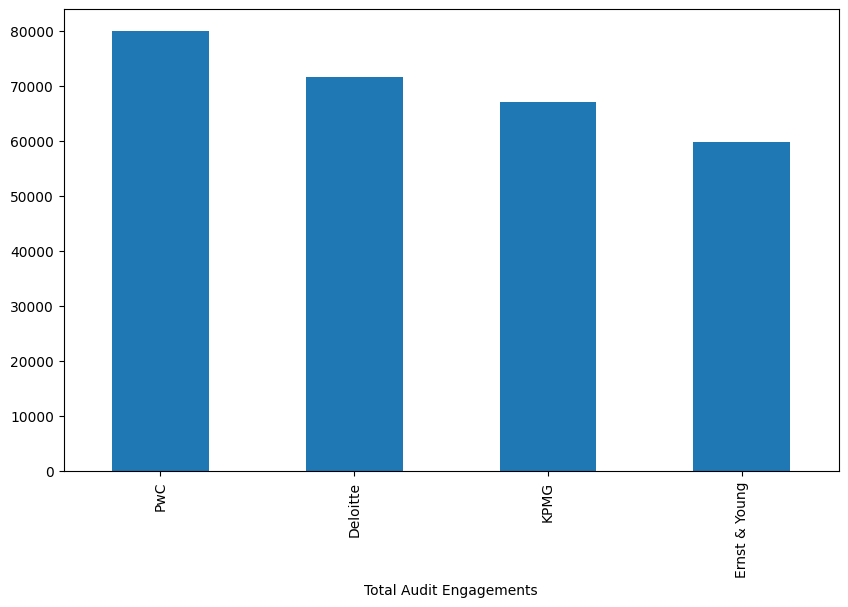

In [27]:
df.groupby('Firm_Name')['Total_Audit_Engagements'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Total Audit Engagements')

**Which industry faced the most fraud cases?**

Text(0.5, 0, 'Number of Fraud Cases Detected')

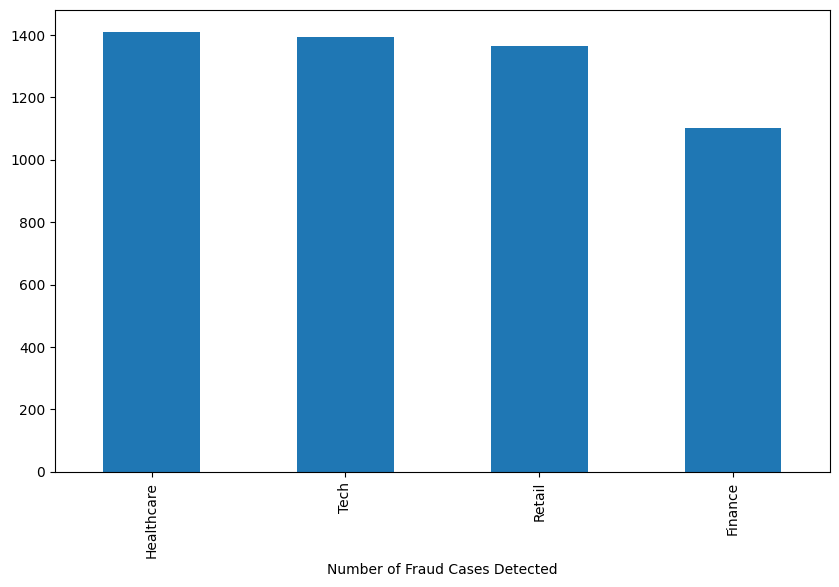

In [26]:
df.groupby('Industry_Affected')['Fraud_Cases_Detected'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Number of Fraud Cases Detected')

**Did AI reduce employee workload?**

Text(0.5, 0, 'Average Employee Workload ')

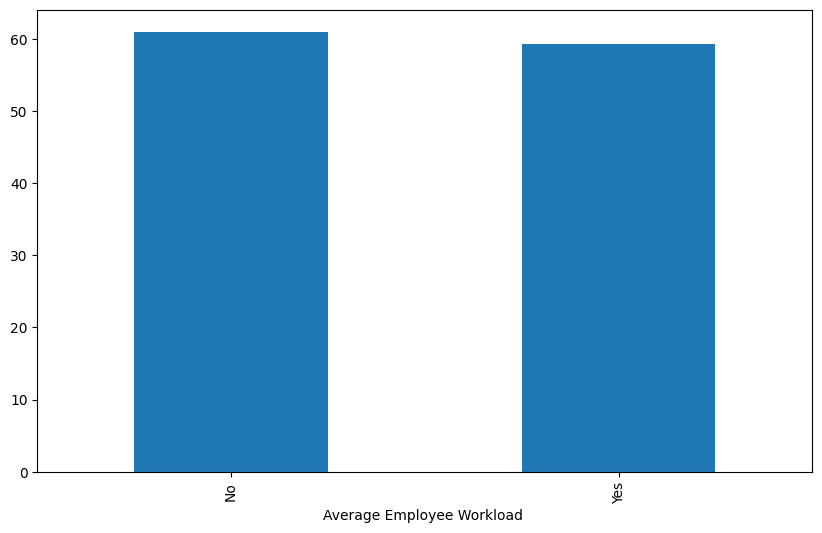

In [ ]:
df.groupby('AI_Used_for_Auditing')['Employee_Workload'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Average Employee Workload')

**Average client satisfaction by firm**

Text(0.5, 0, 'Average Client Satisfaction Score')

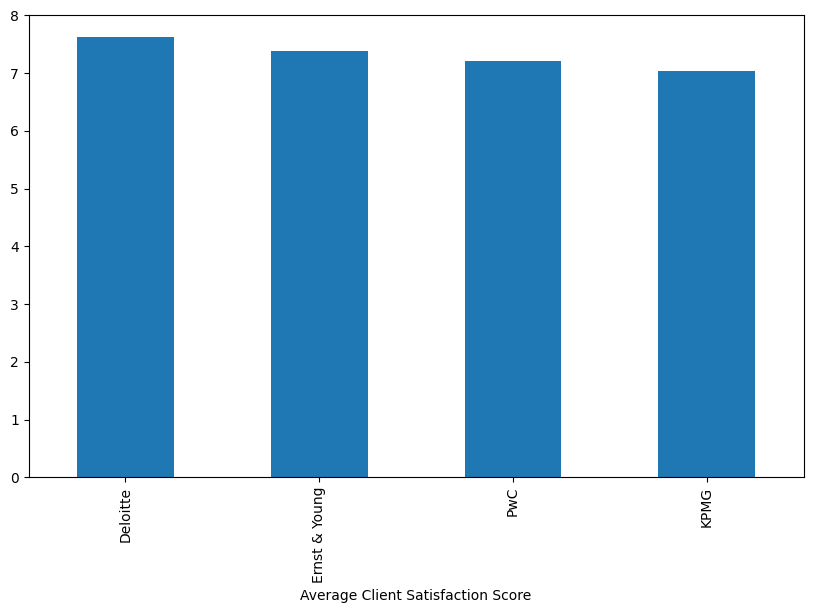

In [31]:
df.groupby('Firm_Name')['Client_Satisfaction_Score'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.xlabel('Average Client Satisfaction Score')

**Compliance Violations by Firm**

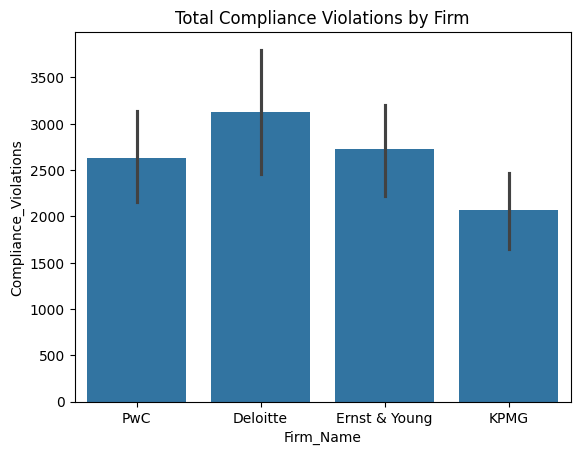

In [28]:
sns.barplot(data=df, x="Firm_Name", y="Compliance_Violations", estimator=sum)
plt.title("Total Compliance Violations by Firm")
plt.show()


**High-Risk Cases Over Time**

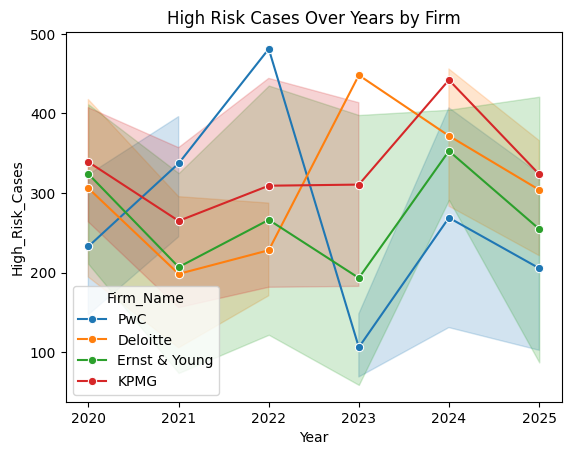

In [32]:
sns.lineplot(data=df, x="Year", y="High_Risk_Cases", hue="Firm_Name", marker="o")
plt.title("High Risk Cases Over Years by Firm")
plt.show()